In [3]:
# kto_total.xlsx 파일 읽어들이기
# 데이터 프레임 변수명 : df 사용
import pandas as pd

file_name = "./files_02/kto_total.xlsx"
df = pd.read_excel(file_name)
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체 비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97,50.6028
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98,8.9287
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95,3.4614
3,마카오,554,0,0,0,0,554,2010-01,아시아,100,0.1382
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75,3.3367
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,81,0.0415
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,27,0.0506
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,26,0.1662
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,77,0.0029


In [4]:
# 시각화 라이브러리 불러들이기
import matplotlib.pyplot as plt
# 폰트지정 라이브러리 - 한글 깨짐 방지
from matplotlib import font_manager, rc
# 운영체제 확인 라이브러리
import platform

In [5]:
# 한글처리 기본적으로 사용
# 윈도우 용
plt.rc("font",family = "Malgun Gothic")

In [6]:
# if platform.system() == "Windows":
#     path = "c:/Windows/Fonts/malgun.ttf"
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc("font",family=font_name)
# elif platfor.system() == "Darwin":
#     rc("font",family="AppleGothic")
# else:
#     print("Check your OS system")
    

In [7]:
# 음수 기호 처리 설정
plt.rcParams['axes.unicode_minus']=False

In [8]:
# 문제
# 중국 국적 데이터만 조회하기
# 변수명 : df_filter 사용
# 조회 결과 건수 출력
# 조회 결과 출력

filter = df["국적"] == "중국"
df_filter = df[filter]
print(len(df_filter))

116


In [9]:
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체 비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44,10.0856
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,44,13.5692
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,44,9.2274
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,44,15.5075
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,44,16.9521
...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,44,29.6948
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,44,33.5572
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,44,31.9263
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,44,36.0774


<function matplotlib.pyplot.show(close=None, block=None)>

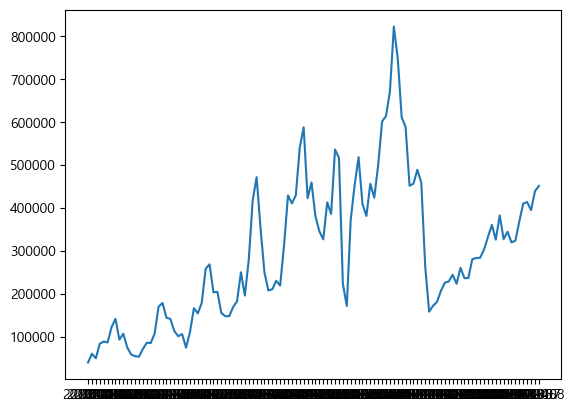

In [10]:
# 선그래프 그리기 : 기준년월별 관광객 추이
plt.plot(df_filter["기준년월"], df_filter["관광"])
plt.show

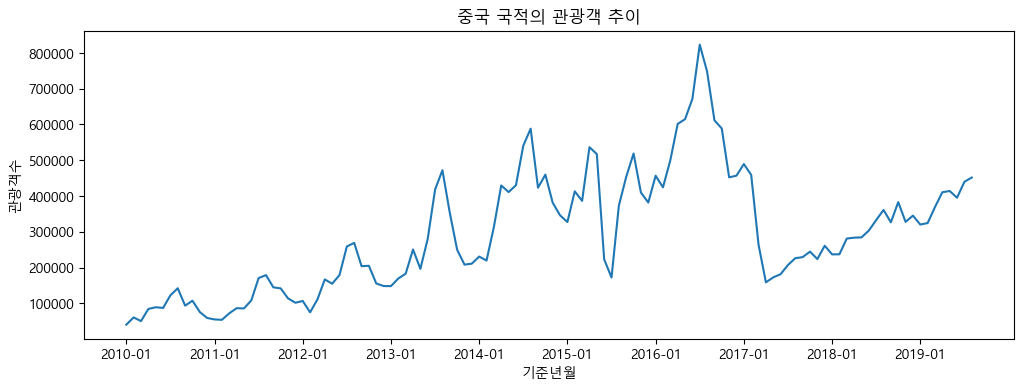

In [11]:
# 그래프 디자인

#그래프 크기조절
plt.figure(figsize = (12,4))

# 그래프 내용 설정
plt.plot(df_filter["기준년월"], df_filter["관광"])

# 그래프 제목 넣기
plt.title("중국 국적의 관광객 추이")

# 그래프 축 이름 넣기
plt.xlabel("기준년월"), plt.ylabel("관광객수")

# x축 눈금 값 설정(구간 범위/찍는 범위 설정), 매년 1월만
plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01","2015-01",
            "2016-01","2017-01","2018-01","2019-01"])

# 그래프 보이기 
plt.show()

In [12]:
# 문제
# 우리나라에 방문하는 외국인 관광객이 가장 많은 국가 순으로 top5 조회하기
# 조회결과는 temp 변수 사용

# pivot_table로 국적별 관광객수를 전부 더한다
temp = df.pivot_table(values="관광",index="국적",aggfunc="sum")
# 내림차순 정렬 / 위 과정에서 표 형식으로 표시되므로 reset_index()로 데이터프레임으로 변환 / head(5)로 5개 표시
temp = temp.sort_values(by="관광",ascending=False).reset_index().head(5)
temp

,국적,관광
0,중국,33874151
1,일본,25620624
2,대만,6645144
3,미국,5757170
4,홍콩,4682239


In [13]:
# 문제
# 우리나라에 방문하는 외국인 관광객이 가장 많은 국가 순으로 top5 조회하기
# 조회결과는 temp 변수 사용

# pivot_table로 국적별 관광객수를 전부 더한다 / 내림차순 정렬 / head(5)로 5개 표시
temp = df.pivot_table(values="관광",index="국적",aggfunc="sum").sort_values(by="관광",ascending=False).head(5)
temp

,관광
국적,
중국,33874151
일본,25620624
대만,6645144
미국,5757170
홍콩,4682239


In [14]:
# 피벗테이블의 형태를 데이터프레임 형태로 변환
# inplace = True : 메모리에 자동 저장
temp.reset_index(inplace=True)
temp

,국적,관광
0,중국,33874151
1,일본,25620624
2,대만,6645144
3,미국,5757170
4,홍콩,4682239


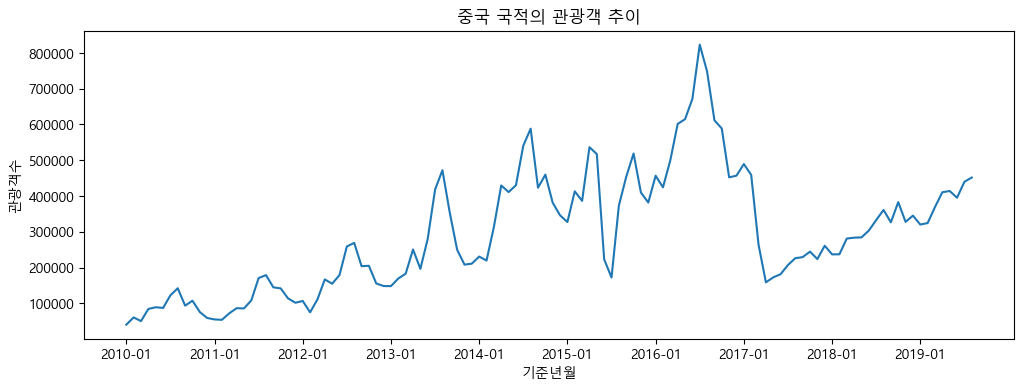

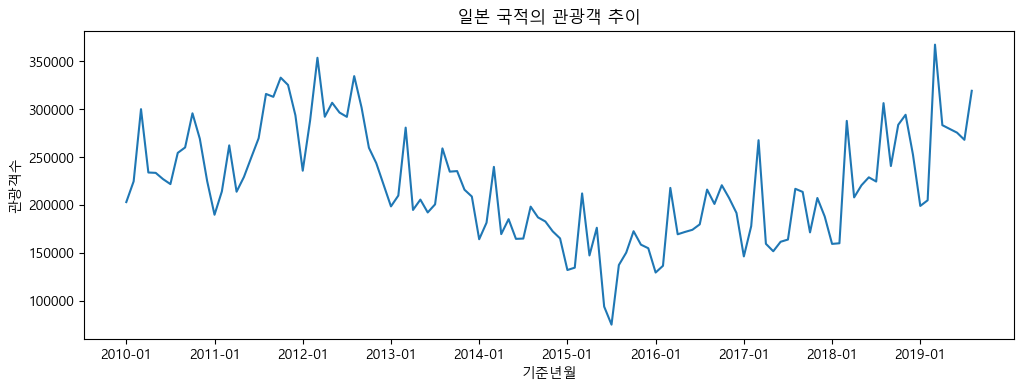

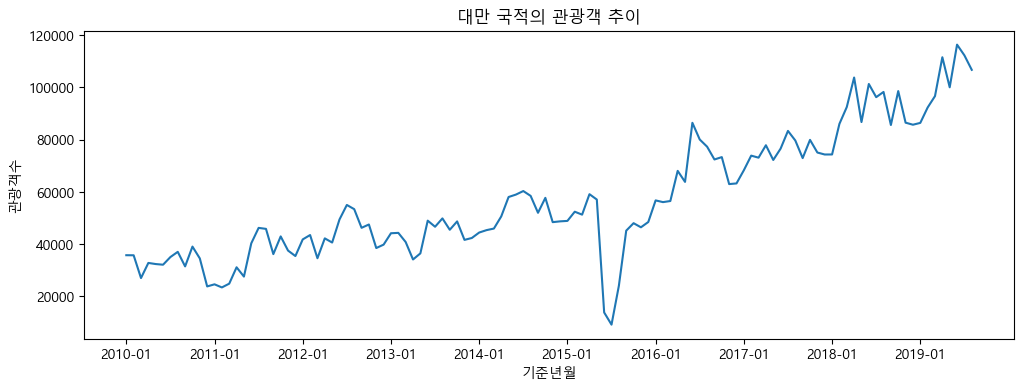

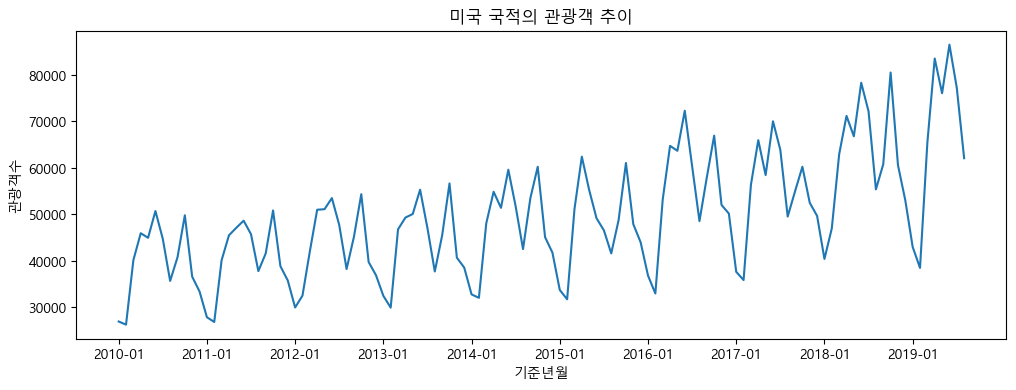

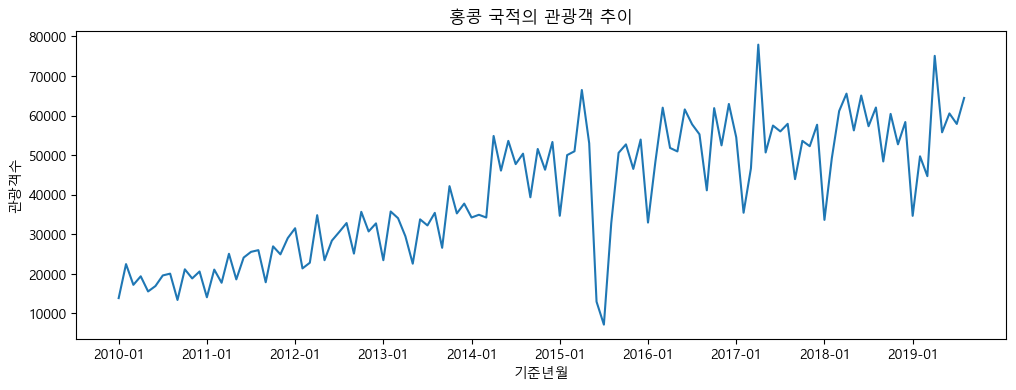

In [19]:
# 반복문을 이용하여 top5 국가 각각에 대한 기준년월별 관광객 입국객수 시각화


for i in range(5):
    filter = df["국적"] == temp["국적"][i]
    
    df_filter = df[filter]
    
    
    # 그래프 디자인

    #그래프 크기조절
    plt.figure(figsize = (12,4))

    # 그래프 내용 설정
    plt.plot(df_filter["기준년월"], df_filter["관광"])

    # 그래프 제목 넣기
    plt.title(temp["국적"][i] +" 국적의 관광객 추이")

    # 그래프 축 이름 넣기
    plt.xlabel("기준년월"), plt.ylabel("관광객수")

    # x축 눈금 값 설정(구간 범위/찍는 범위 설정), 매년 1월만
    plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01","2015-01",
                "2016-01","2017-01","2018-01","2019-01"])

    # 그래프 보이기 
    plt.show()

In [24]:
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체 비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97,50.6028
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98,8.9287
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95,3.4614
3,마카오,554,0,0,0,0,554,2010-01,아시아,100,0.1382
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75,3.3367
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,81,0.0415
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,27,0.0506
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,26,0.1662
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,77,0.0029


In [45]:
# 년도 및 월별 입국객수의 추이분석

# 년도 및 월에 대한 컬럼 추가
# 문제
# 기준년도에서 년도, 월을 각각 추출해서 df 데이터프레임에 "년도", "월" 컬럼 추가

date = df["기준년월"]
year = []
month =[]
for i in range(len(date)):
    year.append(date[i][:4])
    month.append(date[i][5:])

In [46]:
df["년도"] = year
df["월"] = month
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체 비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97,50.6028,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98,8.9287,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95,3.4614,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100,0.1382,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75,3.3367,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,81,0.0415,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,27,0.0506,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,26,0.1662,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,77,0.0029,2019,08


In [54]:
# 다른방법
# df["년도"] = df["기준년월"].str.slice(0,4)
# df["월"] = df["기준년월"].str.slice(5,7)

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6955    2019
6956    2019
6957    2019
6958    2019
6959    2019
Name: 기준년월, Length: 6960, dtype: object

In [57]:
# "국적"이 중국인 데이터만 조회
df_filter = df[df["국적"] == "중국"]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체 비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44,10.0856,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,44,13.5692,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,44,9.2274,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,44,15.5075,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,44,16.9521,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,44,29.6948,2019,04
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,44,33.5572,2019,05
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,44,31.9263,2019,06
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,44,36.0774,2019,07


In [64]:
# 히트맵 시각화에서는 피벗테이블 형태의 데이터로 만든다
# 인덱스 : 년도
# 컬럼 : 월
# 데이터 : 관광
# 사용하는 함수 사용 안함
df_pivot = df_filter.pivot_table(values="관광", index="년도", columns="월")
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


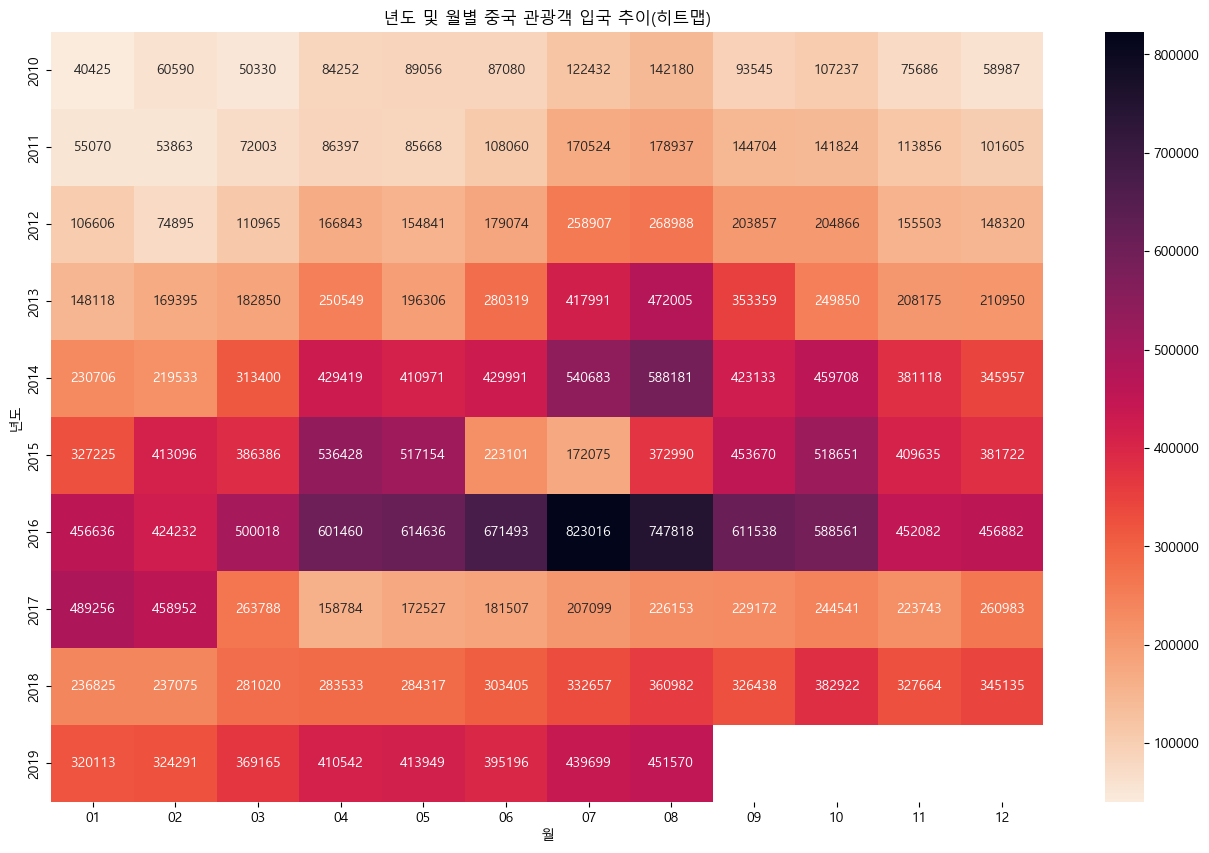

In [71]:
# 히트맵 시각화
# 히트맵 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 그리기
# 그래프 크기 지정 : 너비 16, 높이 10
plt.figure(figsize = (16,10))
# 히트맵 그래프 함수에 데이터 넣기
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")
# 그래프 제목 넣기
plt.title("년도 및 월별 중국 관광객 입국 추이(히트맵)")
# 그래프 보여주기
plt.show()

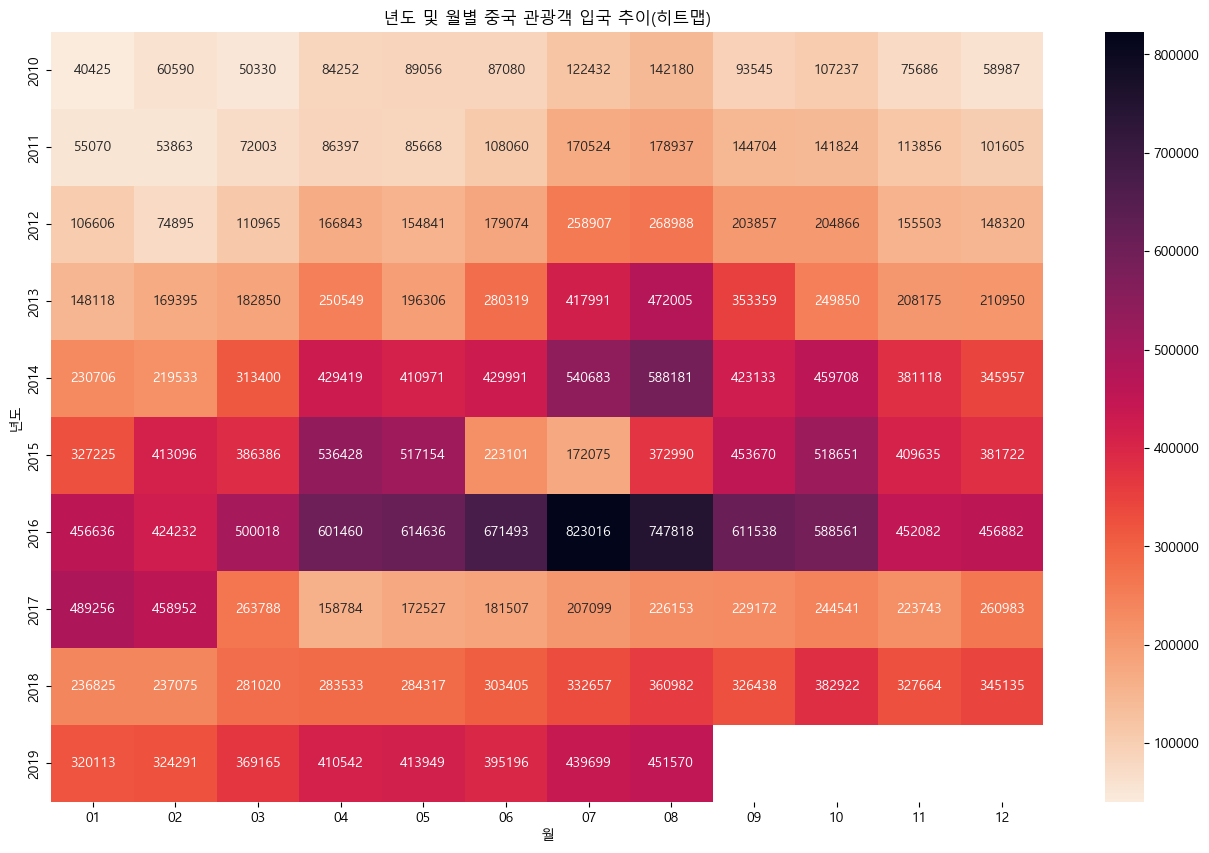

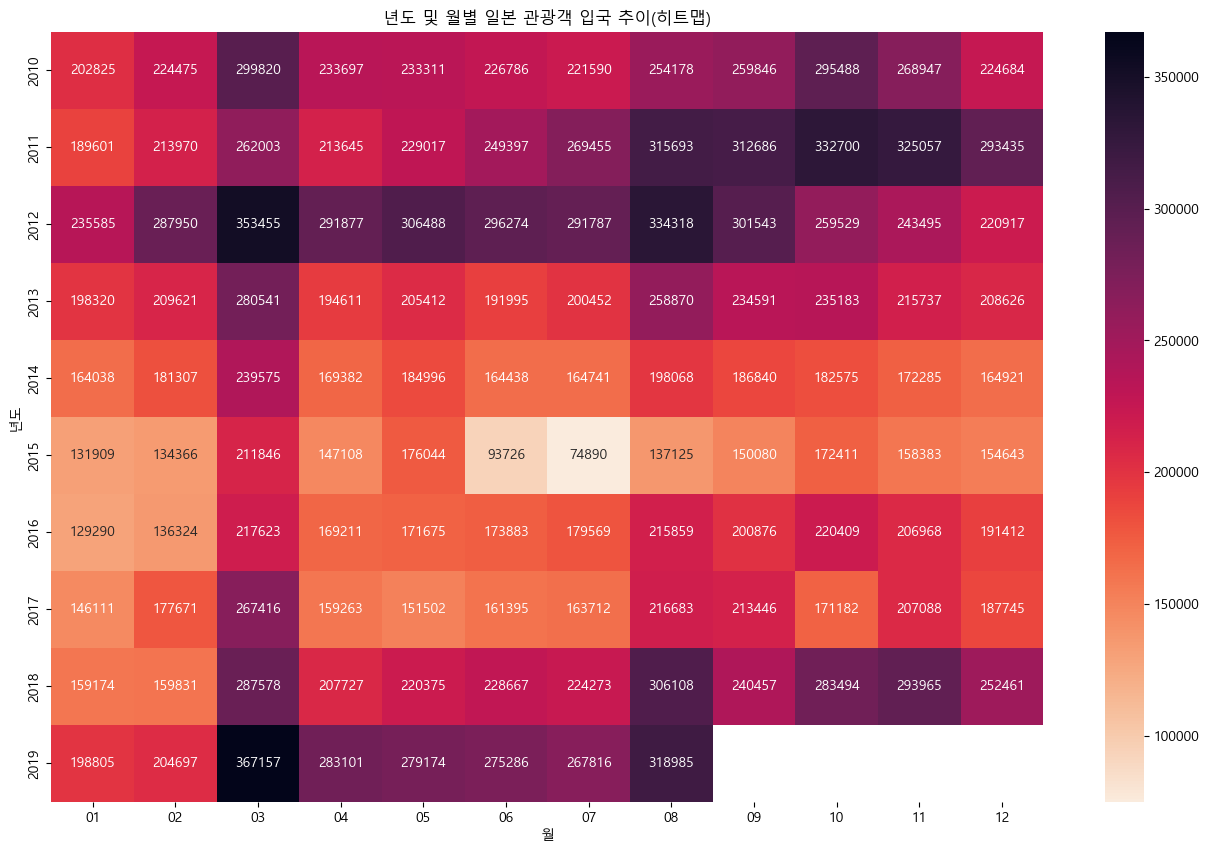

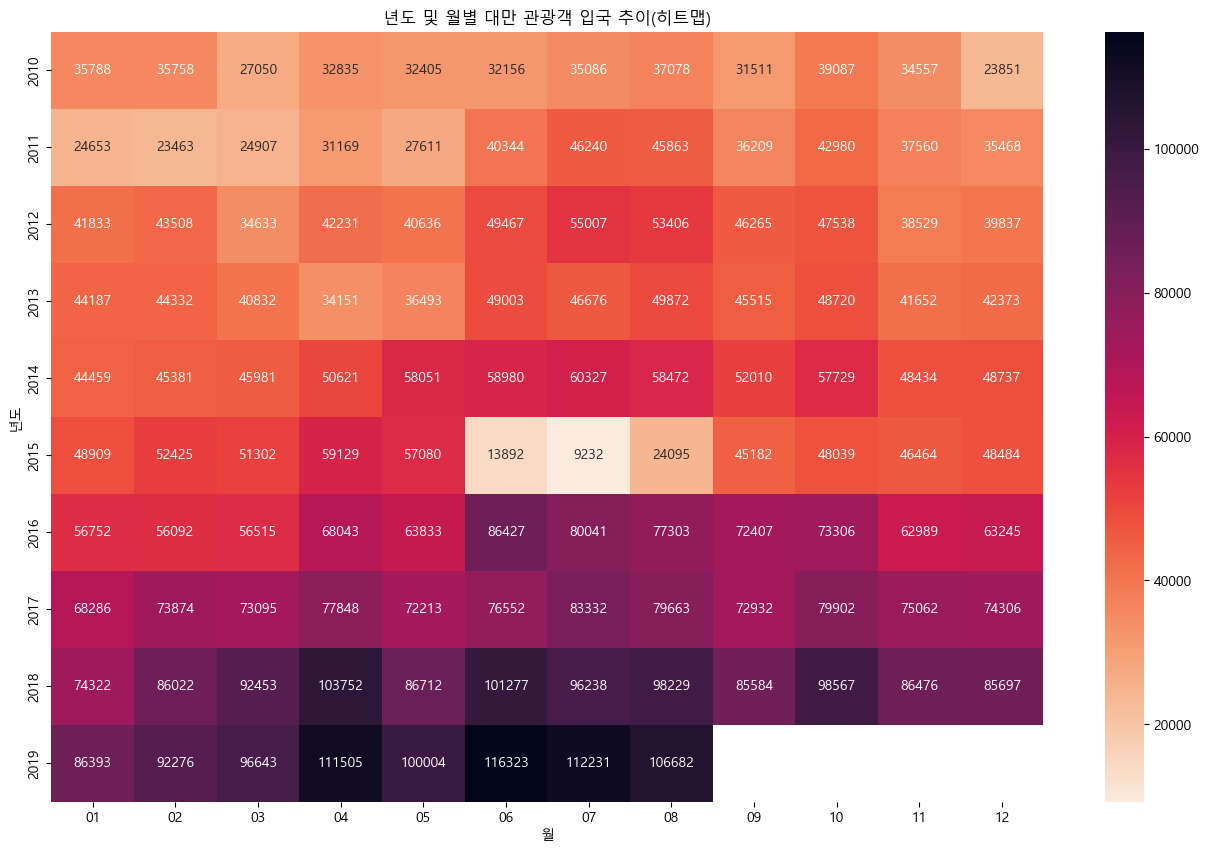

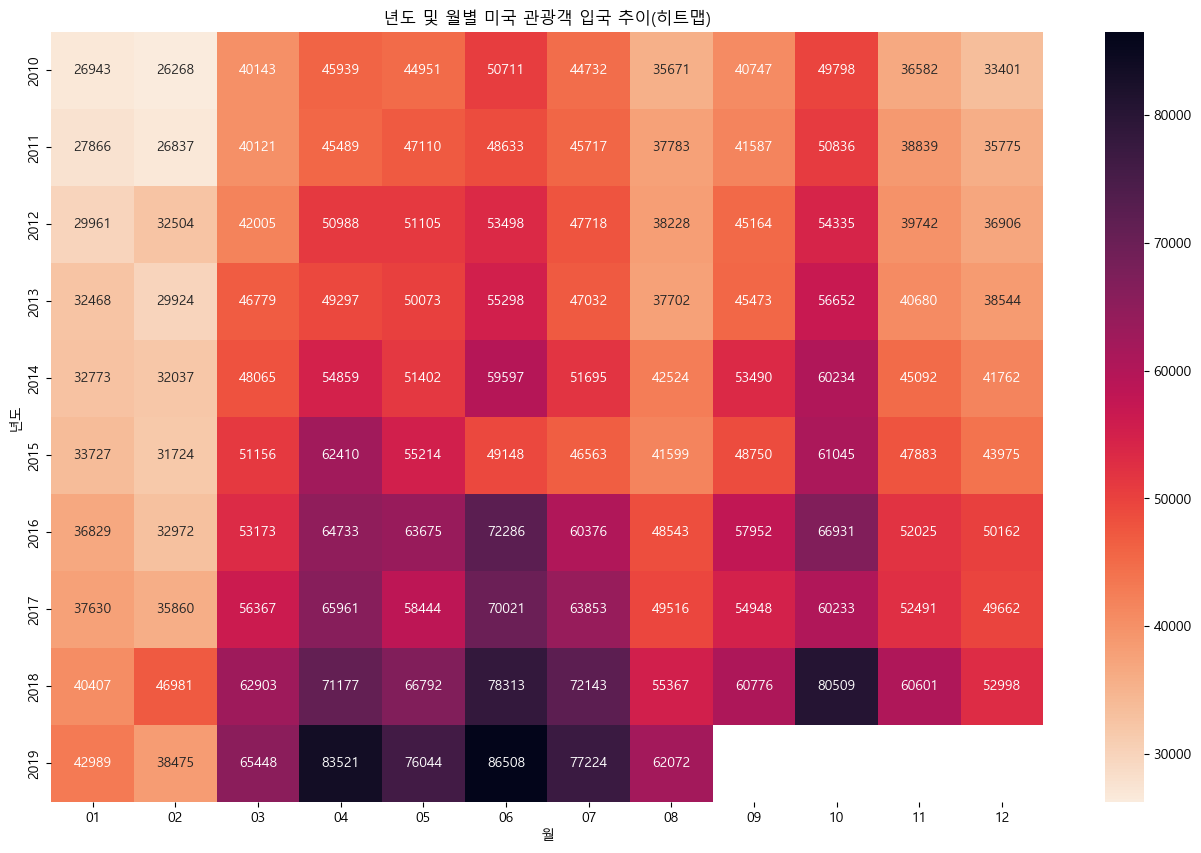

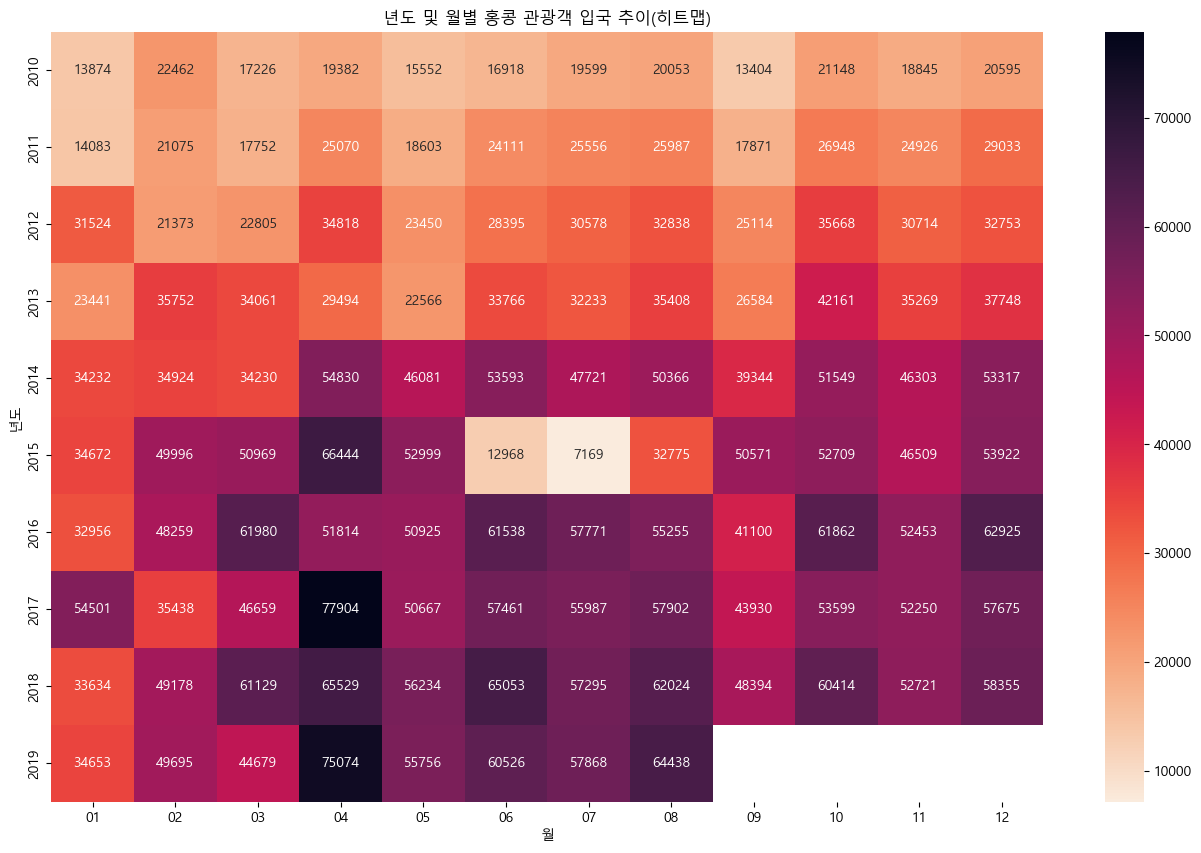

In [74]:
# top5 국가 각각에 대한 히트맵 그리기

for i in range(5):
    # 다양한 방식으로 가능
    filter = df["국적"] == temp["국적"][i]
    df_filter = df[filter]
    df_pivot = df_filter.pivot_table(values="관광", index="년도", columns="월")
    
    
    # 그래프 디자인

    #그래프 크기조절
    plt.figure(figsize = (16,10))
    
    # 히트맵 그래프 함수에 데이터 넣기
    sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="rocket_r")

    # 그래프 제목 넣기
    plt.title("년도 및 월별 {} 관광객 입국 추이(히트맵)".format(temp["국적"][i]))

    # 그래프 보이기 
    plt.show()